In [58]:
import pandas as pd
import numpy as np
import os
import sys
import cv2
from google.colab.patches import cv2_imshow
import matplotlib.pyplot as plt
import random
from sklearn import metrics
import seaborn as sns
import math

In [3]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [23]:
used_commands = ['yes', 'no', 'up', 'down', 
                 'left', 'right', 'on', 'off', 
                 'stop', 'go']
path = '/content/gdrive/MyDrive/IASR/spectrograms/'

In [ ]:
os.listdir('/content/gdrive/MyDrive/IASR/spectrograms/up')

In [16]:
img = cv2.imread('/content/gdrive/MyDrive/IASR/spectrograms/up/88f8a99c_nohash_1.png', 0) -30

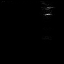

In [17]:
cv2_imshow(img)

yes 474
no 480
up 487
down 475
left 470
right 472
on 462
off 474
stop 453
go 469


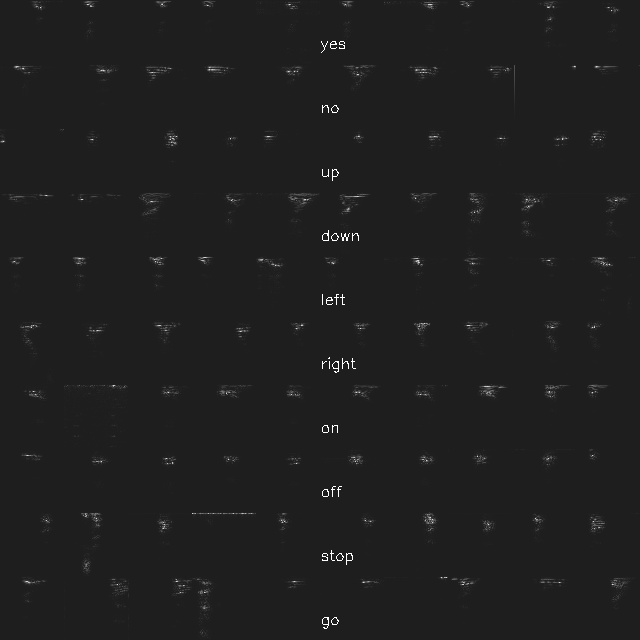

In [24]:
#vconcat
v_img = []
for comm in used_commands:
  img_list = os.listdir(path+comm+'/')[:10]
  img = []
  [img.append(cv2.imread(path+comm+'/'+name, 0)) for name in img_list]
  img = cv2.hconcat(img)
  img = cv2.putText(img,comm, (320,48), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 255, 255) )
  v_img.append(img)

f_img = cv2.vconcat(v_img)

cv2_imshow(f_img)

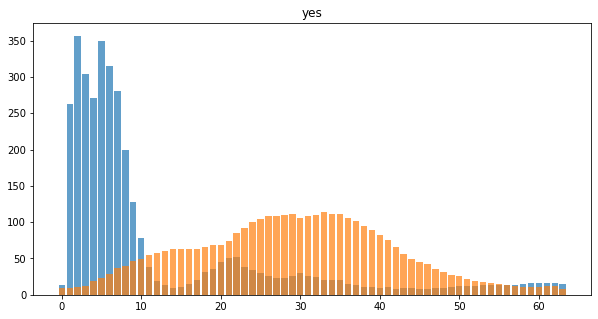

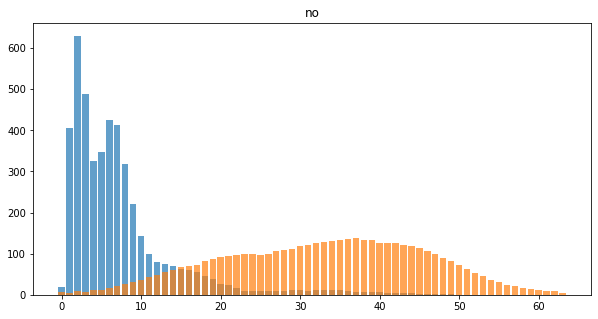

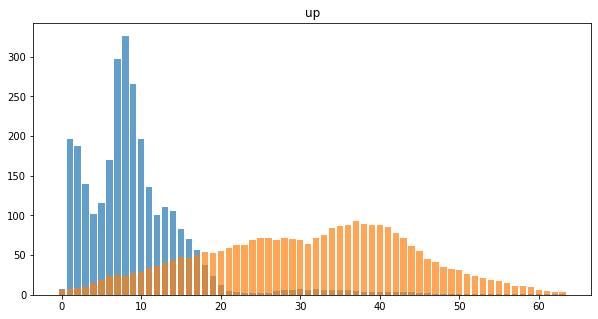

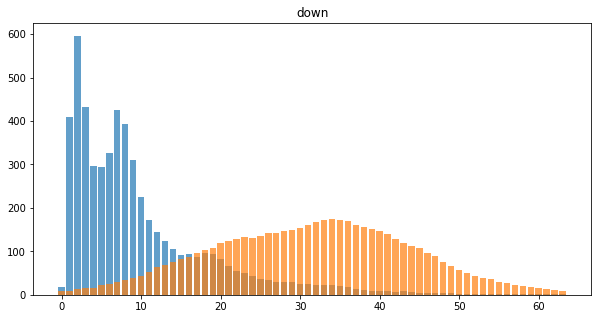

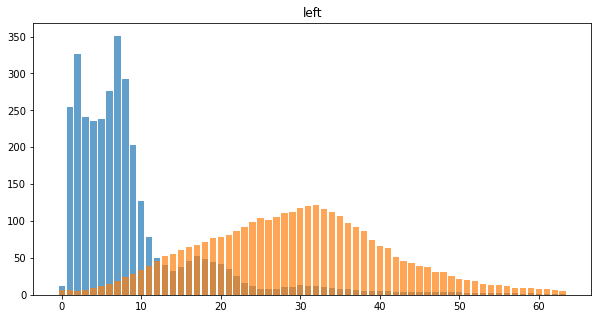

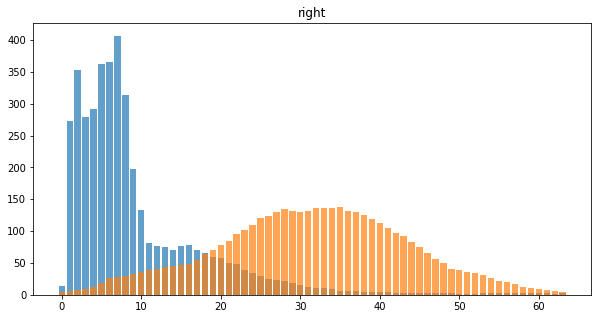

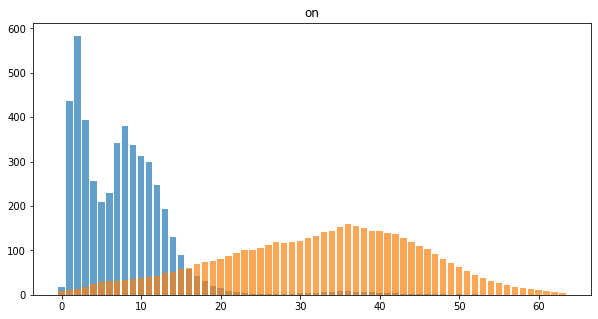

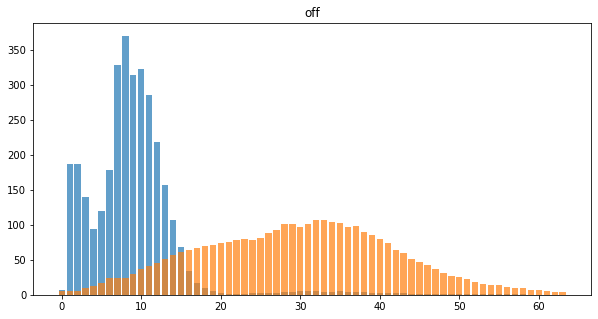

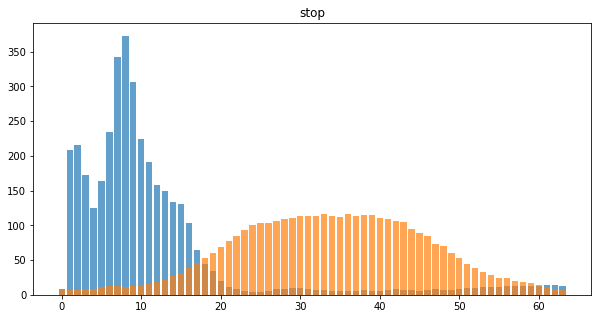

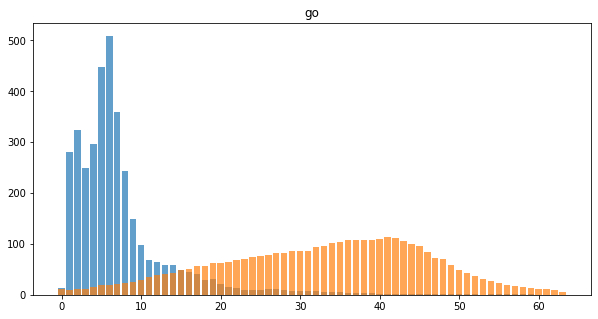

In [25]:
for comm in used_commands:
  valsy = [0]*64
  valsx = [0]*64
  counter = 0
  for pic in os.listdir(path+comm+'/'):
    counter +=1
    img = cv2.imread(path+comm+'/'+pic, 0) - 30
    for i in range(64):
      valsy[i] += sum(img[i,:])
      valsx[i] += sum(img[:,i])
  
  for i in range(64):
    valsy[i] = valsy[i]/counter
    valsx[i] = valsx[i]/counter

  fig, axis = plt.subplots(figsize =(10, 5))
  axis.bar(list(range(64)),valsy, alpha = 0.7)
  axis.bar(list(range(64)),valsx, alpha = 0.7)

  plt.title(comm)
  plt.show()


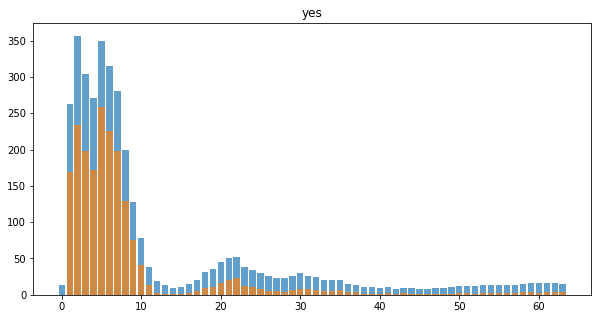

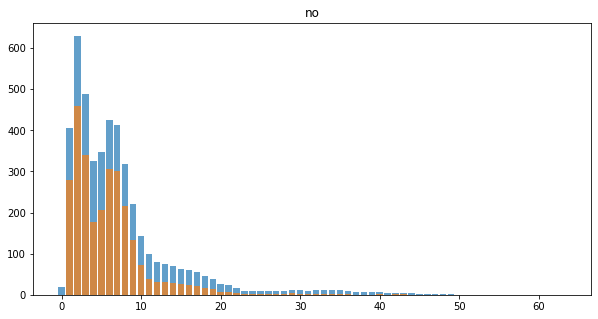

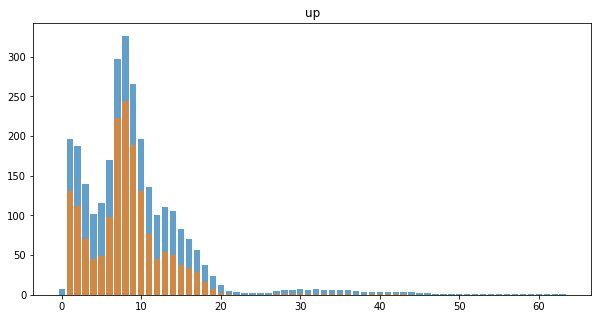

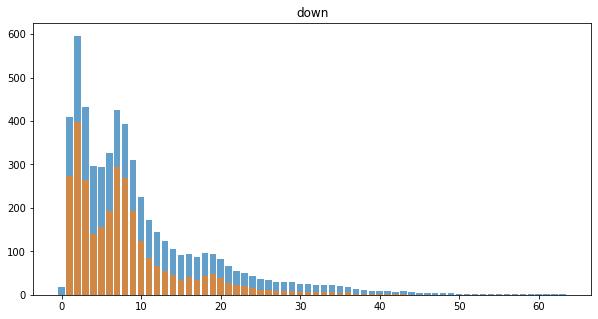

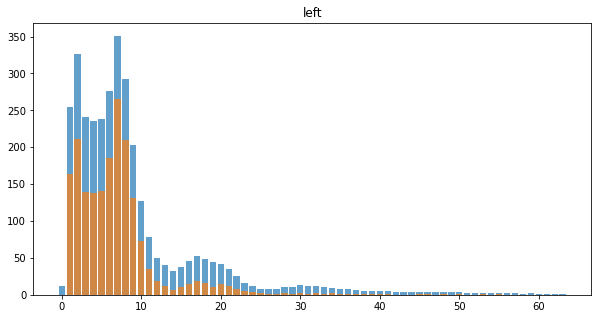

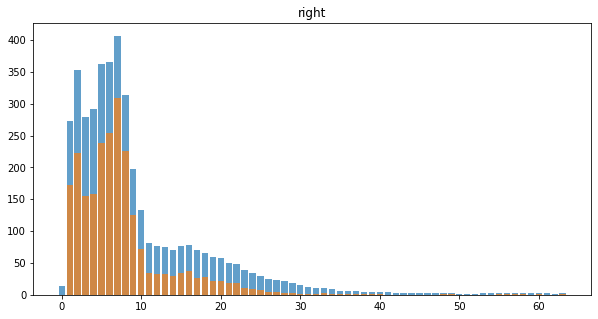

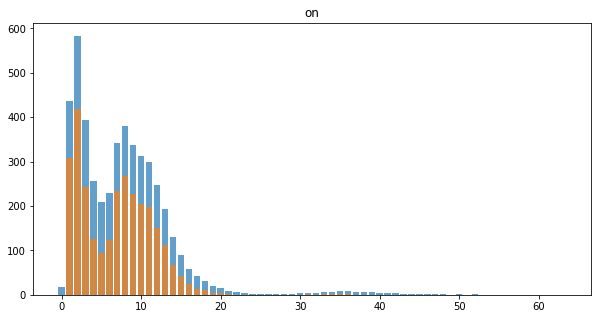

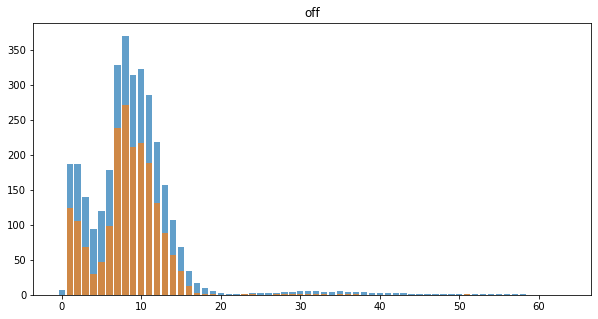

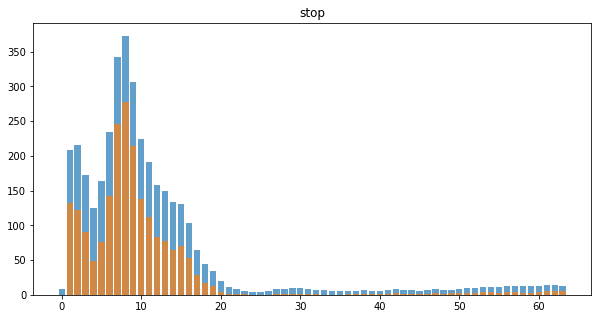

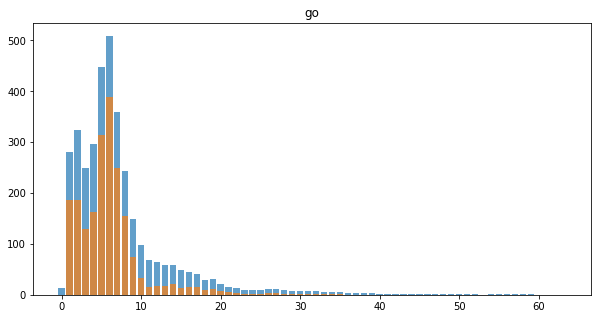

In [28]:
for comm in used_commands:
  valsy = [0]*64
  valsyt = [0]*64
  counter = 0

  for pic in os.listdir(path+comm+'/'):
    counter +=1
    img = cv2.imread(path+comm+'/'+pic, 0) - 30
    for i in range(64):
      v = np.copy(img[i,:])
      v[v < 30] = 0
      valsyt[i] += sum(v)
      valsy[i] += sum(img[i,:])
      

  for i in range(64):
    valsy[i] = valsy[i]/counter
    valsyt[i] = valsyt[i]/counter

  fig, axis = plt.subplots(figsize =(10, 5))

  axis.bar(list(range(64)),valsy, alpha = 0.7)
  axis.bar(list(range(64)),valsyt, alpha = 0.7)

  plt.title(comm)
  plt.show()


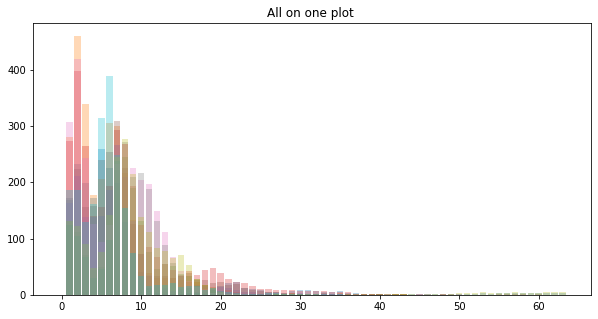

In [30]:
fig, axis = plt.subplots(figsize =(10, 5))
for comm in used_commands:
  valsy = [0]*64
  valsyt = [0]*64
  counter = 0

  for pic in os.listdir(path+comm+'/'):
    counter +=1
    img = cv2.imread(path+comm+'/'+pic, 0) - 30
    for i in range(64):
      v = np.copy(img[i,:])
      v[v < 30] = 0
      valsyt[i] += sum(v)
      valsy[i] += sum(img[i,:])
      

  for i in range(64):
    valsy[i] = valsy[i]/counter
    valsyt[i] = valsyt[i]/counter

  #fig, axis = plt.subplots(figsize =(10, 5))

  #axis.bar(list(range(64)),valsy, alpha = 0.7)
  axis.bar(list(range(64)),valsyt, alpha = 0.3)

plt.title("All on one plot ")
plt.show()


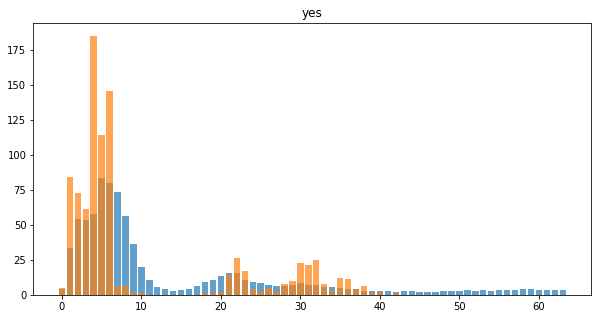

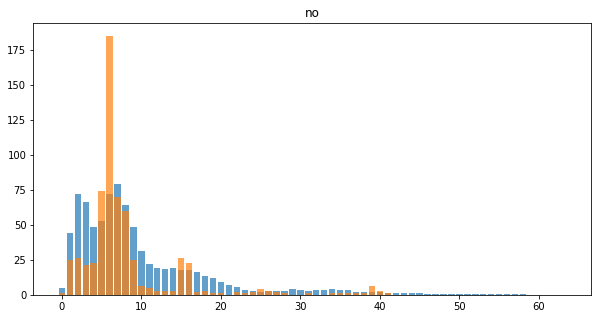

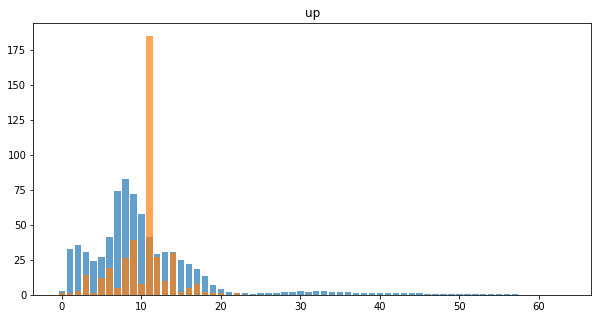

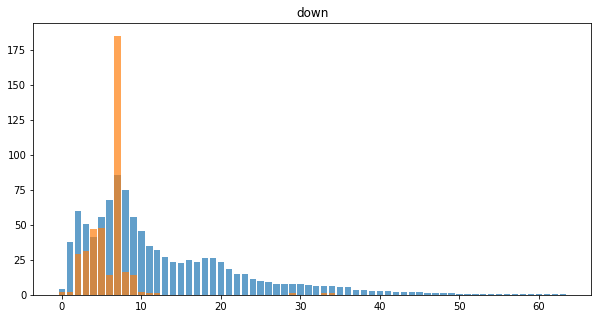

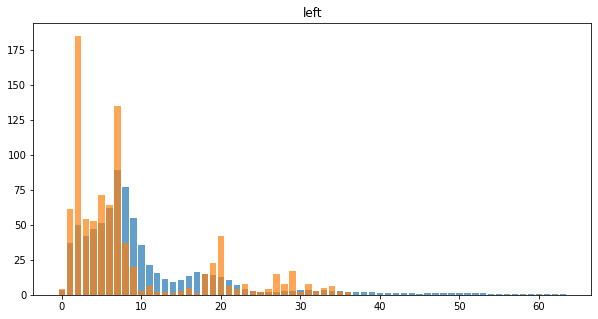

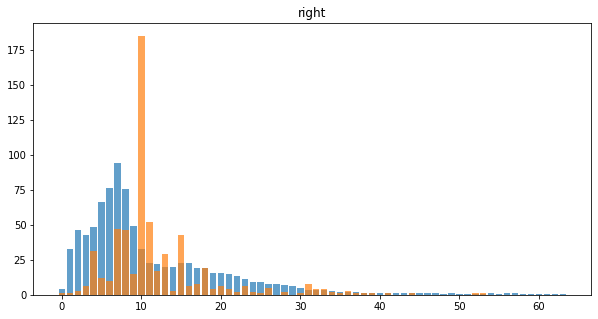

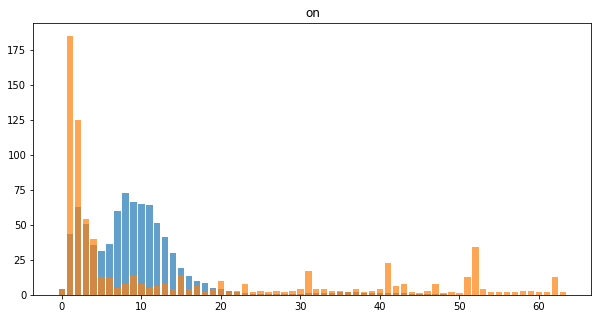

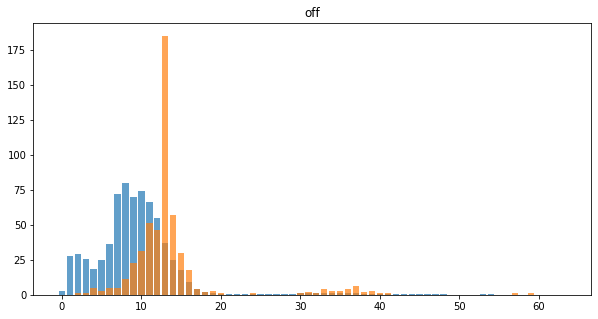

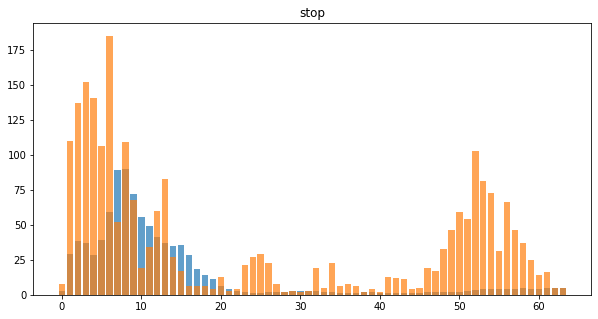

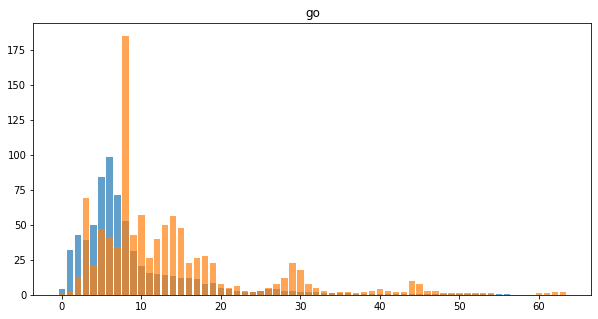

In [112]:
max_voters = {}
for comm in used_commands:
  valsy = [0]*64
  counter = 0

  for pic in os.listdir(path+comm+'/')[:-100]:
    counter +=1
    img = cv2.imread(path+comm+'/'+pic, 0) - 30
    for i in range(64):
      valsy[i] += max(img[i,:])
  
  pic = os.listdir(path+comm+'/')[1]
  img = cv2.imread(path+comm+'/'+pic, 0) - 30

  one_pic_vec = [0]*64

  for i in range(64):
      one_pic_vec[i] += max(img[i,:])
  
  for i in range(64):
    valsy[i] = valsy[i]/counter

  max_voters[comm] = valsy

  fig, axis = plt.subplots(figsize =(10, 5))
  
  axis.bar(list(range(64)),valsy, alpha = 0.7)
  axis.bar(list(range(64)),one_pic_vec, alpha = 0.7)

  plt.title(comm)
  plt.show()


In [113]:

y = []
y_pred = []
class_idx = 0
for comm in used_commands:

  for pic in os.listdir(path+comm+'/')[-100:]:
    vy = np.array([0]*64)
    y.append(class_idx)
    vote = [0]*10
    img = cv2.imread(path+comm+'/'+pic, 0) - 30
    for i in range(64):
      vy[i] = max(img[i,:])
    
    args = list(np.argsort(vy))[-5:]
    pred = 0
    dist = 128
    for arg in args:
      val = vy[arg]
      for comm_pick,i in zip(used_commands,range(len(used_commands))):
        if np.absolute(val - max_voters[comm_pick][arg]) < dist :
          dist = np.absolute(val - max_voters[comm_pick][arg])
          pred = i
      
      vote[pred] += 1

    pred = np.argmax(vote)
    y_pred.append(pred)
  
  class_idx +=1
  


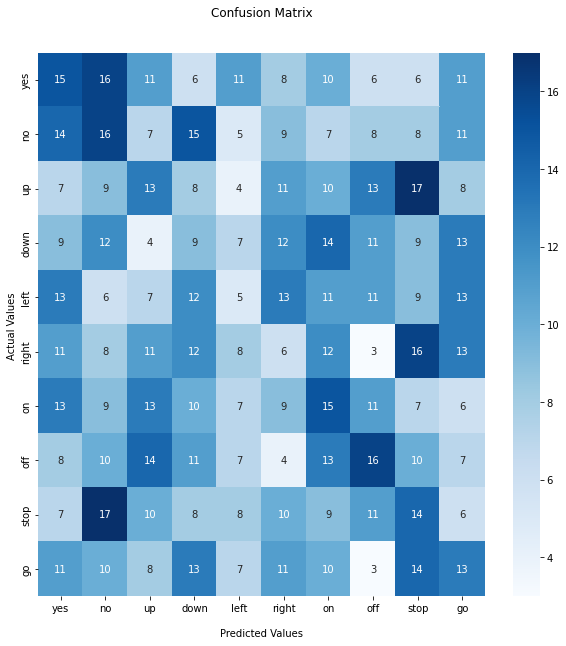

In [114]:
fig, ax = plt.subplots(figsize=(10, 10))

cma = metrics.confusion_matrix(y, y_pred)

ax = sns.heatmap(cma, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(used_commands)
ax.yaxis.set_ticklabels(used_commands)

plt.show()

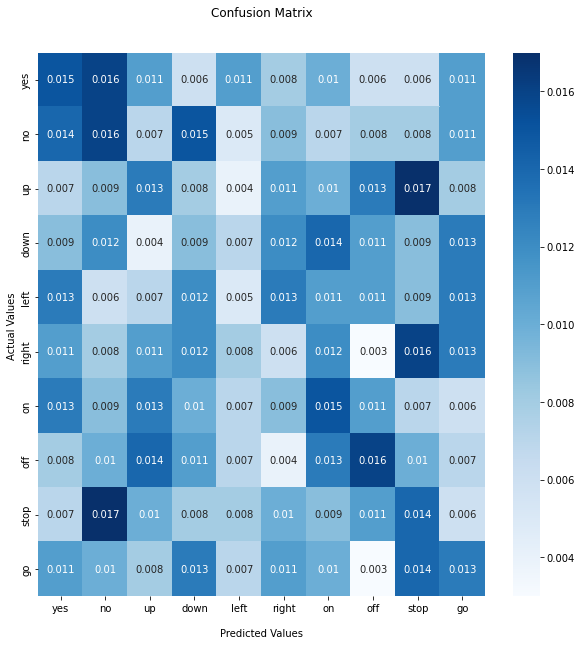

In [115]:
fig, ax = plt.subplots(figsize=(10, 10))

cma = metrics.confusion_matrix(y, y_pred, normalize = 'all')

ax = sns.heatmap(cma, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(used_commands)
ax.yaxis.set_ticklabels(used_commands)

plt.show()

In [117]:
def k_closest(k=5):
  y = []
  y_pred = []
  class_idx = 0
  for comm in used_commands:

    for pic in os.listdir(path+comm+'/')[-100:]:
      vy = np.array([0]*64)
      y.append(class_idx)
      vote = [0]*10
      img = cv2.imread(path+comm+'/'+pic, 0) - 30
      for i in range(64):
        vy[i] = max(img[i,:])
      
      args = list(np.argsort(vy))[-k:]
      pred = 0
      dist = 128
      for arg in args:
        val = vy[arg]
        for comm_pick,i in zip(used_commands,range(len(used_commands))):
          if np.absolute(val - max_voters[comm_pick][arg]) < dist :
            dist = np.absolute(val - max_voters[comm_pick][arg])
            pred = i

        vote[pred] += 1

      pred = np.argmax(vote)
      #print(pred,vote)
      y_pred.append(pred)
    
    class_idx +=1

  acc = 0
  for i in range(len(y)):
    if(y[i]==y_pred[i]):
      acc +=1
  
  return acc/len(y)


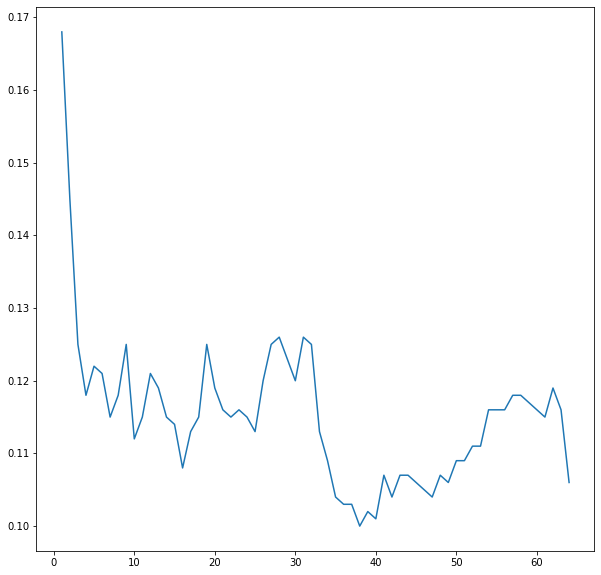

In [121]:
accuracy = []
for i in range(1,65):
  accuracy.append(k_closest(i))

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(list(range(1,65)),accuracy)

plt.show()

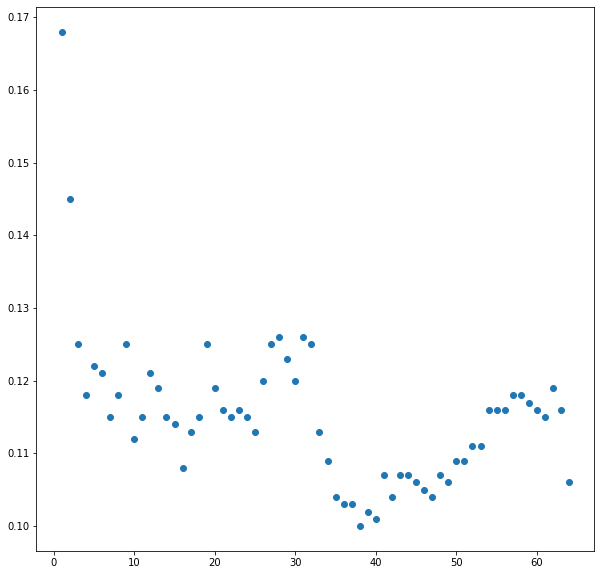

In [122]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(list(range(1,65)),accuracy)

plt.show()

In [127]:
mean_voters = {}
for comm in used_commands:
  valsy = [0]*64
  counter = 0

  for pic in os.listdir(path+comm+'/')[:-100]:
    counter +=1
    img = cv2.imread(path+comm+'/'+pic, 0) - 30
    for i in range(64):
      valsy[i] += np.mean(img[i,:])

  for i in range(64):
    valsy[i] = valsy[i]/counter
    
  mean_voters[comm] = valsy


In [129]:
y = []
y_pred = []
class_idx = 0
for comm in used_commands:

  for pic in os.listdir(path+comm+'/')[-100:]:
    vy = np.array([0]*64)
    y.append(class_idx)
    vote = [0]*10
    img = cv2.imread(path+comm+'/'+pic, 0) - 30
    for i in range(64):
      vy[i] = np.mean(img[i,:])
    
    args = list(np.argsort(vy))[-5:]
    pred = 0
    dist = 128
    for arg in args:
      val = vy[arg]
      for comm_pick,i in zip(used_commands,range(len(used_commands))):
        if np.absolute(val - mean_voters[comm_pick][arg]) < dist :
          dist = np.absolute(val - mean_voters[comm_pick][arg])
          pred = i
      
      vote[pred] += 1

    pred = np.argmax(vote)
    y_pred.append(pred)
  
  class_idx +=1
  


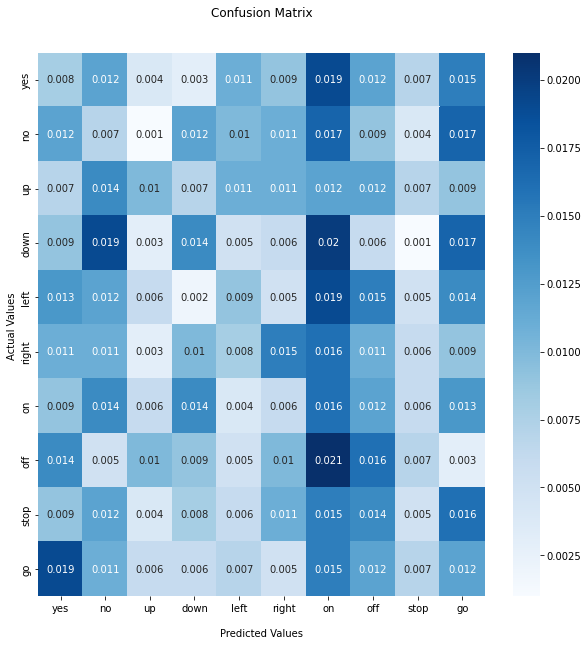

In [130]:
fig, ax = plt.subplots(figsize=(10, 10))

cma = metrics.confusion_matrix(y, y_pred, normalize = 'all')

ax = sns.heatmap(cma, annot=True, cmap='Blues')

ax.set_title('Confusion Matrix\n\n');
ax.set_xlabel('\nPredicted Values')
ax.set_ylabel('Actual Values ');

ax.xaxis.set_ticklabels(used_commands)
ax.yaxis.set_ticklabels(used_commands)

plt.show()

In [131]:
def k_closest(k=5):
  y = []
  y_pred = []
  class_idx = 0
  for comm in used_commands:

    for pic in os.listdir(path+comm+'/')[-100:]:
      vy = np.array([0]*64)
      y.append(class_idx)
      vote = [0]*10
      img = cv2.imread(path+comm+'/'+pic, 0) - 30
      for i in range(64):
        vy[i] = np.mean(img[i,:])
      
      args = list(np.argsort(vy))[-k:]
      pred = 0
      dist = 128
      for arg in args:
        val = vy[arg]
        for comm_pick,i in zip(used_commands,range(len(used_commands))):
          if np.absolute(val - mean_voters[comm_pick][arg]) < dist :
            dist = np.absolute(val - mean_voters[comm_pick][arg])
            pred = i

        vote[pred] += 1

      pred = np.argmax(vote)
      #print(pred,vote)
      y_pred.append(pred)
    
    class_idx +=1

  acc = 0
  for i in range(len(y)):
    if(y[i]==y_pred[i]):
      acc +=1
  
  return acc/len(y)


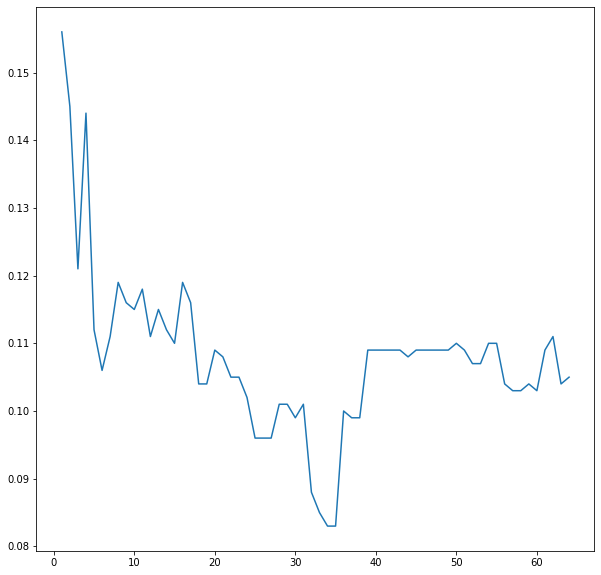

In [136]:
accuracy = []
for i in range(1,65):
  accuracy.append(k_closest(i))

fig, ax = plt.subplots(figsize=(10, 10))
ax.plot(list(range(1,65)),accuracy)

plt.show()

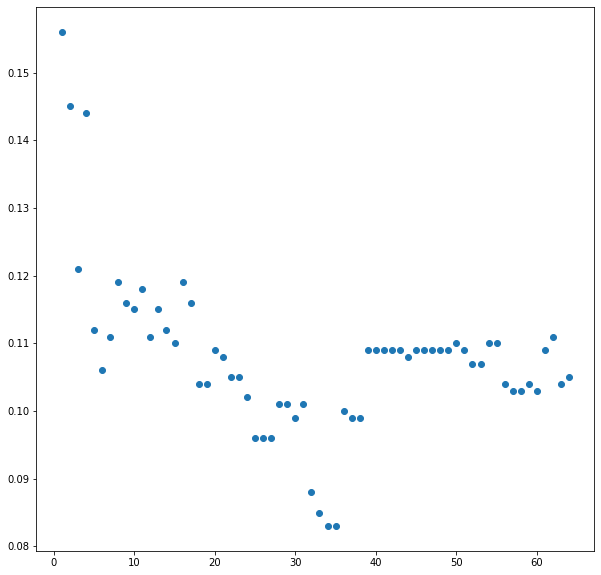

In [137]:
fig, ax = plt.subplots(figsize=(10, 10))
ax.scatter(list(range(1,65)),accuracy)

plt.show()